In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pylib.utils.functions_for_classification import lin_separable_1d_2cls
from matplotlib.colors import ListedColormap

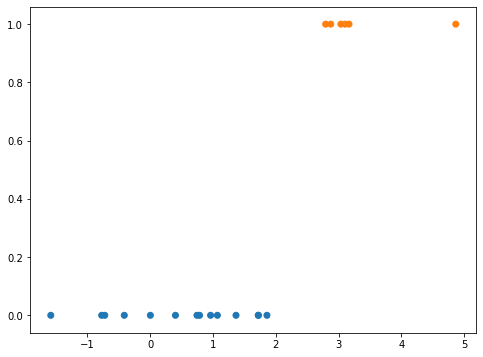

In [3]:
sample_size = 20
x, y = lin_separable_1d_2cls(sample_size)

plt.figure(figsize=(8, 6))
colors = ['C0', 'C1']
plt.scatter(x, y, c=y, cmap=ListedColormap(colors))
plt.show()

## 感知器

In [4]:
import ipyvolume.pylab as plt3d

### 阶梯函数

In [5]:
def step_function(X, W):
    return np.where(X @ W > 0, 1, 0).ravel()

### 优化函数

In [109]:
def perceptron_loss(X, W, y):
    y_pred = step_function(X, W)
    return np.where(-y.T @ y_pred <= 0, 0, -y.T @ y_pred)

In [12]:
X = np.c_[np.ones(len(x)), x]
def relu_cost(W, x=X, y=y, lamb=0.0):
    y_pred = step_function(X, W)
    temp = 1-y.flatten() * y_pred.flatten()
    cost = 1 / len(y) * np.sum([np.max([0, t]) for t in temp]) + lamb * W.T @ W
    return cost

In [9]:
X = np.c_[np.ones(len(x)), x]
loss = lambda W: np.sum(np.where(-y.T * step_function(X, W) <= 0, 0, -y.T * step_function(X, W)))

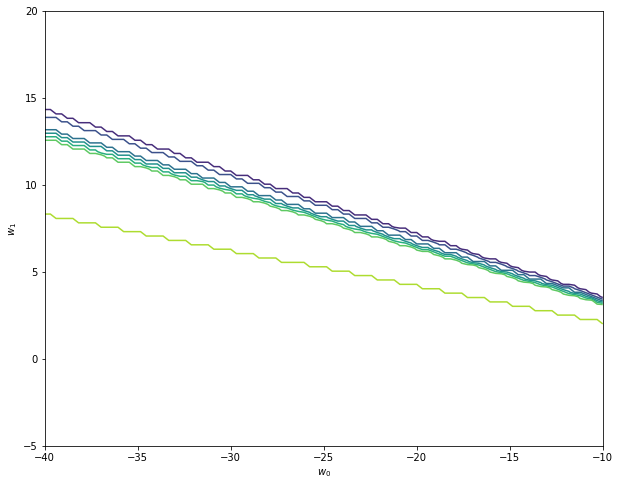

In [13]:
w0n = np.linspace(-40, -10, 100)
w1n = np.linspace(-5, 20, 100)
ww0n, ww1n = np.meshgrid(w0n, w1n)
Wn = np.c_[ww0n.ravel(), ww1n.ravel()]
lossn = np.array([relu_cost(W=w) for w in Wn]).reshape(ww0n.shape)
# w0_path = np.array([w[0] for w in weights_history])
# w1_path = np.array([w[1] for w in weights_history])

plt.figure(figsize=(10, 8))
plt.contour(ww0n, ww1n, lossn)
# plt.plot(w0_path, w1_path, ".-", c='r')
# plt.scatter(W[0], W[1], c='yellow', marker='*', s=80, zorder=5)
plt.xlabel(r"$w_0$")
plt.ylabel(r"$w_1$")
plt.show()

In [14]:
from scipy import optimize
# optimize.minimize?

In [16]:
results = optimize.minimize(relu_cost, x0=[-20, 10.], method='Powell')
results

   direc: array([[1., 0.],
       [0., 1.]])
     fun: 0.7000000000000001
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 1
  status: 0
 success: True
       x: array([-17.41207104,  12.58792896])

In [11]:
plt3d.figure(1000, 500)
plt3d.plot_surface(ww0n, lossn, ww1n, color='green')
plt3d.show()

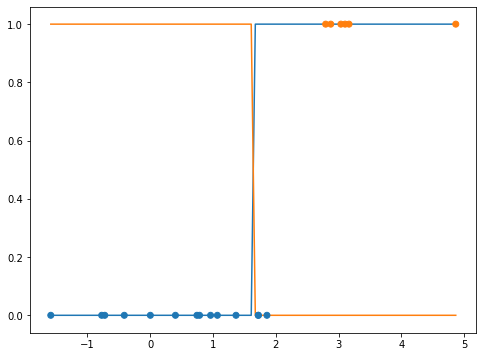

In [52]:
W = results.x
xn = np.linspace(x.min(), x.max(), 100)
Xn = np.c_[np.ones(len(xn)), xn]
yn_pred = step_function(Xn, W)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=y, cmap=ListedColormap(colors), zorder=3)
plt.plot(xn, yn_pred)
plt.plot(xn, 1 - yn_pred)
plt.show()

### 梯度函数

In [13]:
from autograd import grad
import autograd

In [14]:
def gradient_function(X, y):
    return -X.T @ y # np.where(-y @ X > 0, -y @ X, 0)

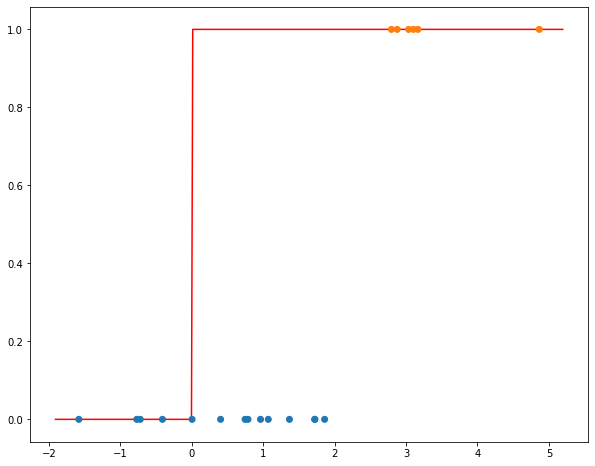

In [100]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=y, cmap=ListedColormap(colors))
xn = np.linspace(plt.xlim()[0], plt.xlim()[1], 400)
Xn = np.c_[np.ones(400), xn]
yn = step_function(Xn, W)
plt.plot(xn, yn, 'r', zorder=0)
plt.show()

In [81]:
from __future__ import division
import numpy as np
np.random.seed(1)
n = 20
m = 1000
TEST = m
DENSITY = 0.2
beta_true = np.random.randn(n,1)
idxs = np.random.choice(range(n), int((1-DENSITY)*n), replace=False)
for idx in idxs:
    beta_true[idx] = 0
offset = 0
sigma = 45
X = np.random.normal(0, 5, size=(m,n))
Y = np.sign(X.dot(beta_true) + offset + np.random.normal(0,sigma,size=(m,1)))
X_test = np.random.normal(0, 5, size=(TEST,n))
Y_test = np.sign(X_test.dot(beta_true) + offset + np.random.normal(0,sigma,size=(TEST,1)))

In [105]:
import cvxpy as cp
beta = cp.Variable(2)
loss = cp.sum(cp.pos(-cp.multiply(y, X @ beta)))
prob = cp.Problem(cp.Minimize(loss))

In [108]:
prob.solve()
beta.value

array([1.00013530e-30, 3.89252709e-38])

In [90]:
X = np.c_[np.ones(len(x)), x]
x, y = lin_separable_1d_2cls(sample_size)

In [98]:
beta.value

array([ 8.00445571e-01, -2.77487676e-04])

In [102]:
X.shape

(20, 2)